In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import copy
#from category_encoders.binary.BinaryEncoder import binary
from sklearn.base import BaseEstimator, TransformerMixin
from category_encoders import binary
from category_encoders import BinaryEncoder

from category_encoders.utils import get_obj_cols, convert_input


In [3]:
data=pd.read_csv('/home/rajat/Downloads/train_data.csv')
#data
data2=data.copy()
data2

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,49,Private,246183,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K
1,57,Private,176904,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
2,50,Private,421561,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,24,Private,29810,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,40,United-States,<=50K
4,21,Private,77572,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,34,South,<=50K
5,38,Private,97083,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,Black,Female,0,0,40,United-States,<=50K
6,59,Local-gov,75785,11th,7,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K
7,52,Private,156953,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,>50K
8,41,Private,190885,HS-grad,9,Separated,Other-service,Unmarried,White,Female,0,0,40,Mexico,<=50K
9,38,Private,272476,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,24,United-States,>50K


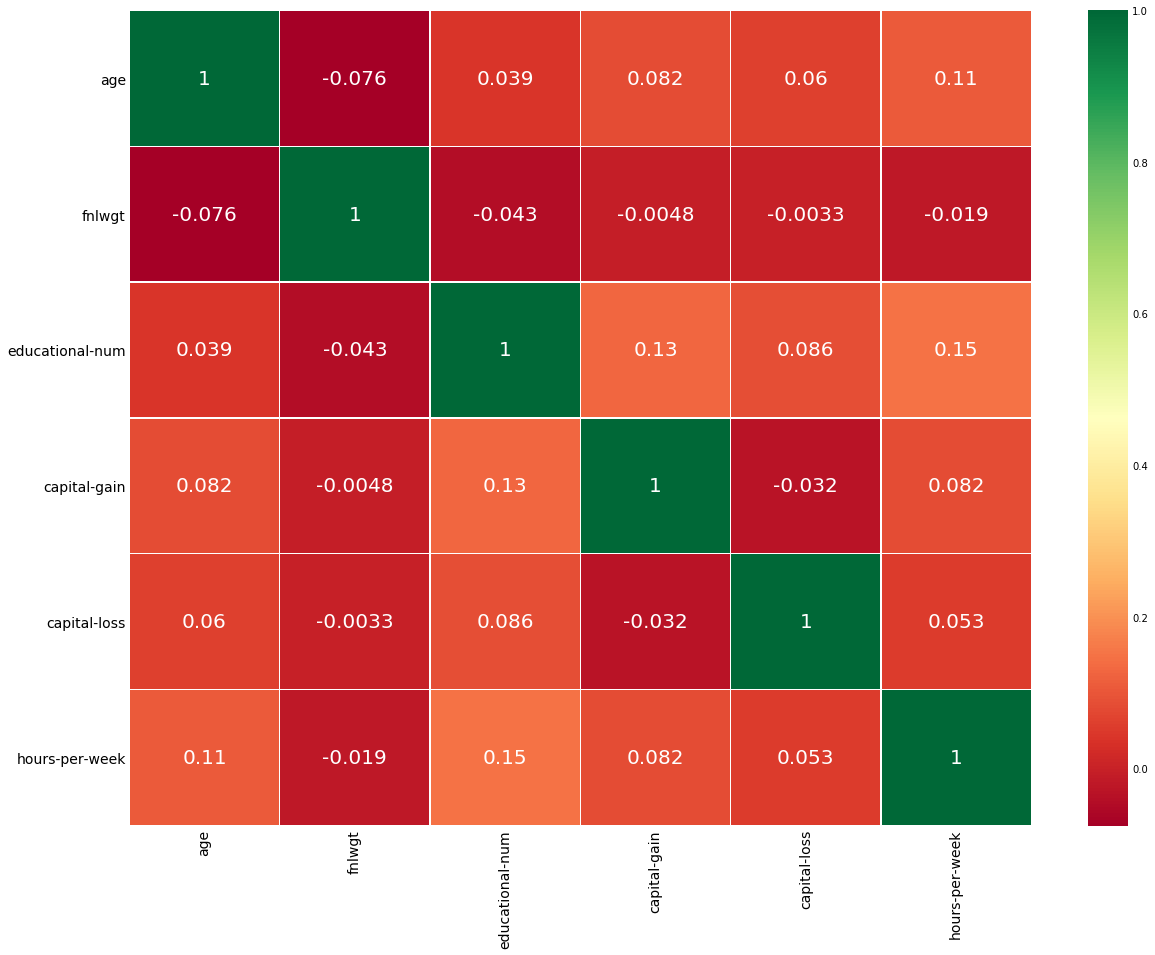

In [4]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


In [5]:
data2.describe()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,36177.000000,3.617700e+04,36177.000000,36177.000000,36177.000000,36177.000000
mean,38.546314,1.896050e+05,10.120601,1097.528043,88.542168,40.926721
std,13.211201,1.047850e+05,2.552581,7453.192629,404.156204,11.952342
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173810e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783830e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.378330e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data2.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
data2['gender'].replace('Male',1,inplace=True)
data2['gender'].replace('Female',0,inplace=True)
data2['income'].replace('>50K',1,inplace=True)
data2['income'].replace('<=50K',0,inplace=True)

data2

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,49,Private,246183,HS-grad,9,Married-civ-spouse,Sales,Husband,White,1,0,0,40,United-States,1
1,57,Private,176904,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,White,1,0,0,40,United-States,0
2,50,Private,421561,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,1,0,0,40,United-States,0
3,24,Private,29810,Some-college,10,Never-married,Prof-specialty,Own-child,White,0,0,0,40,United-States,0
4,21,Private,77572,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,0,0,0,34,South,0
5,38,Private,97083,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,Black,0,0,0,40,United-States,0
6,59,Local-gov,75785,11th,7,Married-civ-spouse,Other-service,Husband,White,1,0,0,40,United-States,0
7,52,Private,156953,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,1,0,0,40,United-States,1
8,41,Private,190885,HS-grad,9,Separated,Other-service,Unmarried,White,0,0,0,40,Mexico,0
9,38,Private,272476,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,0,0,0,24,United-States,1


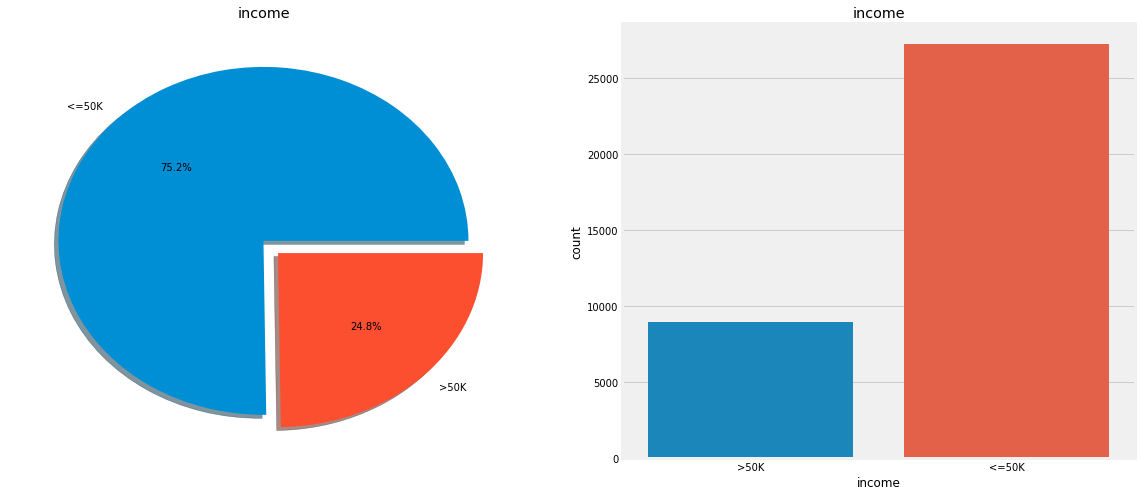

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['income'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('income')
ax[0].set_ylabel('')
sns.countplot('income',data=data,ax=ax[1])
ax[1].set_title('income')
plt.show()

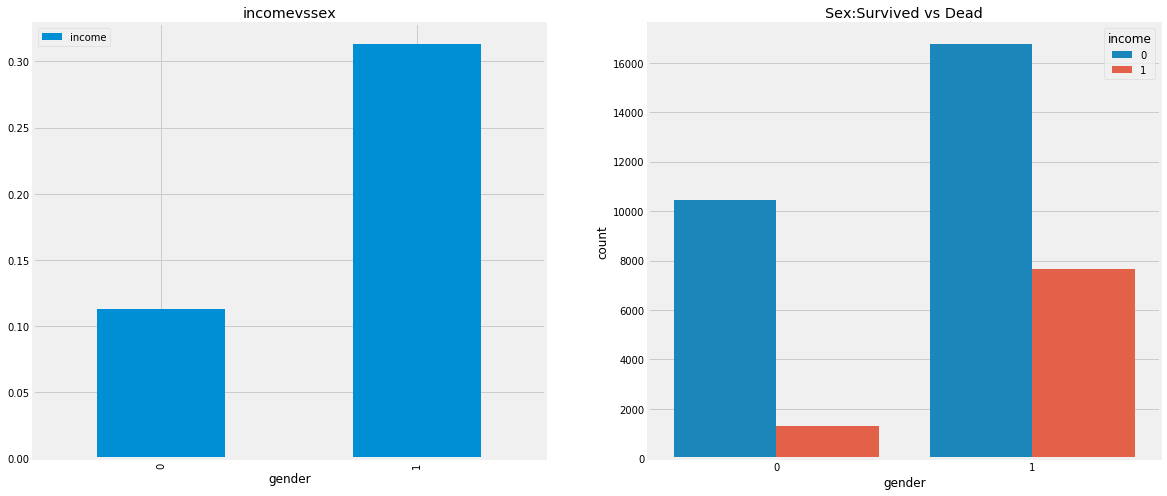

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data2[['gender','income']].groupby(['gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('incomevssex')
sns.countplot('gender',hue='income',data=data2,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [10]:
pd.crosstab(data2.workclass,data2.income,margins=True).style.background_gradient(cmap='summer_r')

income,0,1,All
workclass,,,
Federal-gov,686,430,1116
Local-gov,1762,732,2494
Private,20807,5840,26647
Self-emp-inc,592,719,1311
Self-emp-not-inc,2207,833,3040
State-gov,1143,410,1553
Without-pay,14,2,16
All,27211,8966,36177


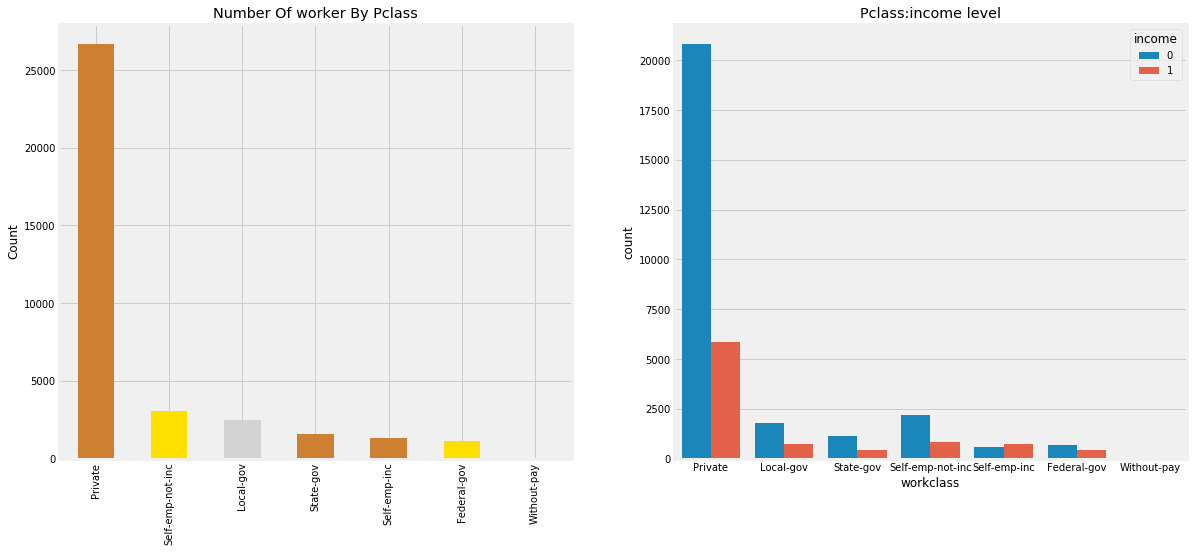

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['workclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of worker By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('workclass',hue='income',data=data2,ax=ax[1])
ax[1].set_title('Pclass:income level')
plt.show()

In [12]:

data2['workclass'].replace('Private',7,inplace=True)
data2['workclass'].replace('Local-gov',6,inplace=True)
data2['workclass'].replace('State-gov',5,inplace=True)
data2['workclass'].replace('Self-emp-not-inc',4,inplace=True)
data2['workclass'].replace('Self-emp-inc',3,inplace=True)
data2['workclass'].replace('Federal-gov',2,inplace=True)
data2['workclass'].replace('Without-pay',1,inplace=True)
data2



,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,49,7,246183,HS-grad,9,Married-civ-spouse,Sales,Husband,White,1,0,0,40,United-States,1
1,57,7,176904,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,White,1,0,0,40,United-States,0
2,50,7,421561,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,1,0,0,40,United-States,0
3,24,7,29810,Some-college,10,Never-married,Prof-specialty,Own-child,White,0,0,0,40,United-States,0
4,21,7,77572,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,0,0,0,34,South,0
5,38,7,97083,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,Black,0,0,0,40,United-States,0
6,59,6,75785,11th,7,Married-civ-spouse,Other-service,Husband,White,1,0,0,40,United-States,0
7,52,7,156953,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,1,0,0,40,United-States,1
8,41,7,190885,HS-grad,9,Separated,Other-service,Unmarried,White,0,0,0,40,Mexico,0
9,38,7,272476,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,0,0,0,24,United-States,1


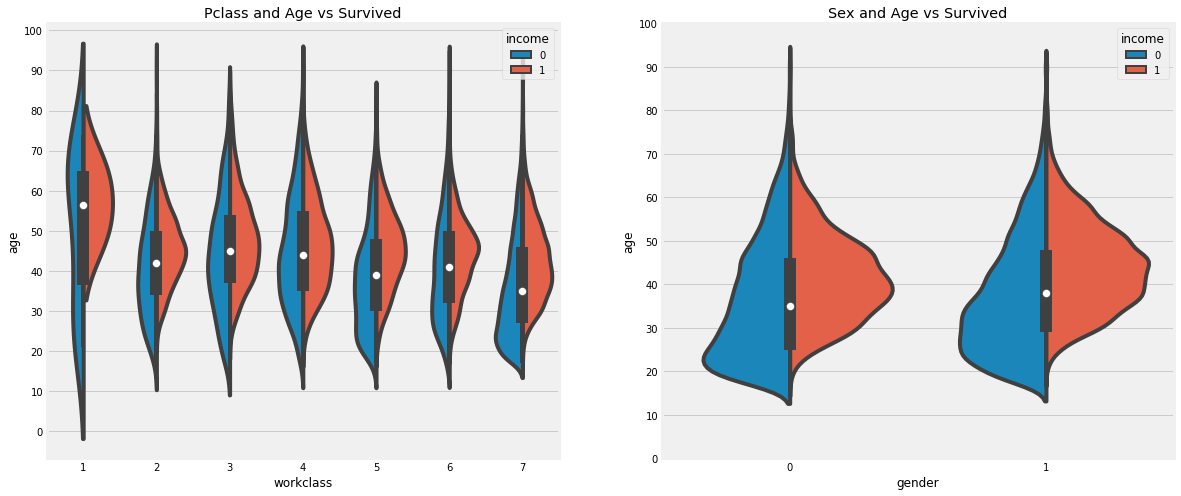

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("workclass","age", hue="income", data=data2,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("gender","age", hue="income", data=data2,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

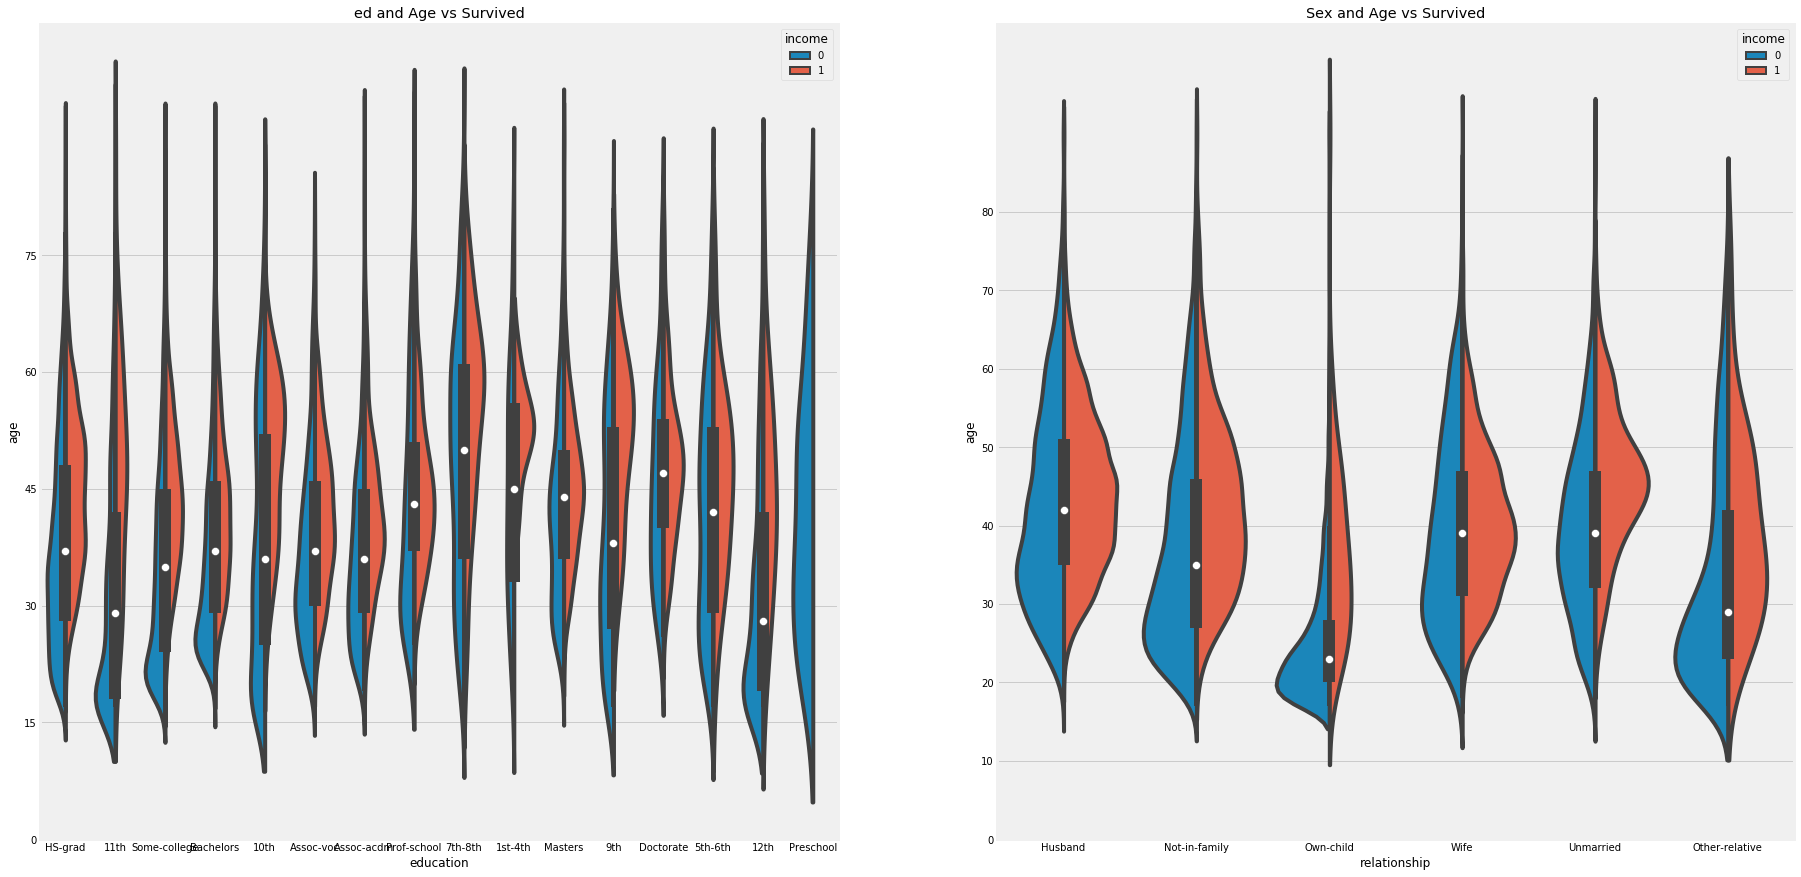

In [14]:
f,ax=plt.subplots(1,2,figsize=(28,15))
sns.violinplot("education","age", hue="income", data=data2,split=True,ax=ax[0])
ax[0].set_title('ed and Age vs Survived')
ax[0].set_yticks(range(0,90,15))
sns.violinplot("relationship","age", hue="income", data=data2,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,90,10))
plt.show()

In [15]:

encoder = BinaryEncoder(cols=['workclass'])
df_bina = encoder.fit_transform(data2)
data2=df_bina
data2


,workclass_0,workclass_1,workclass_2,age,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,0,0,49,246183,HS-grad,9,Married-civ-spouse,Sales,Husband,White,1,0,0,40,United-States,1
1,0,0,0,57,176904,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,White,1,0,0,40,United-States,0
2,0,0,0,50,421561,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,1,0,0,40,United-States,0
3,0,0,0,24,29810,Some-college,10,Never-married,Prof-specialty,Own-child,White,0,0,0,40,United-States,0
4,0,0,0,21,77572,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,0,0,0,34,South,0
5,0,0,0,38,97083,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,Black,0,0,0,40,United-States,0
6,0,0,1,59,75785,11th,7,Married-civ-spouse,Other-service,Husband,White,1,0,0,40,United-States,0
7,0,0,0,52,156953,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,1,0,0,40,United-States,1
8,0,0,0,41,190885,HS-grad,9,Separated,Other-service,Unmarried,White,0,0,0,40,Mexico,0
9,0,0,0,38,272476,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,0,0,0,24,United-States,1


In [16]:
print('Oldest Passenger was of:',data2['age'].max(),'Years')
print('Youngest Passenger was of:',data2['age'].min(),'Years')
print('Average Age on the ship:',data2['age'].mean(),'Years')
print('mode:',data2.mode(),'years')

('Oldest Passenger was of:', 90, 'Years')
('Youngest Passenger was of:', 17, 'Years')
('Average Age on the ship:', 38.546313956381127, 'Years')
('mode:',    workclass_0  workclass_1  workclass_2  age  fnlwgt education  \
0            0            0            0   36  203488   HS-grad   

   educational-num      marital-status    occupation relationship   race  \
0                9  Married-civ-spouse  Craft-repair      Husband  White   

   gender  capital-gain  capital-loss  hours-per-week native-country  income  
0       1             0             0              40  United-States       0  , 'years')


In [17]:
data2['Age_band']=0
data2.loc[data2['age']<=20,'Age_band']=0
data2.loc[(data2['age']>20)&(data2['age']<=30),'Age_band']=1
data2.loc[(data2['age']>30)&(data2['age']<=50),'Age_band']=2
data2.loc[(data2['age']>50)&(data2['age']<=70),'Age_band']=3
data2.loc[data2['age']>70,'Age_band']=4
data2.head()

,workclass_0,workclass_1,workclass_2,age,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Age_band
0,0,0,0,49,246183,HS-grad,9,Married-civ-spouse,Sales,Husband,White,1,0,0,40,United-States,1,2
1,0,0,0,57,176904,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,White,1,0,0,40,United-States,0,3
2,0,0,0,50,421561,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,1,0,0,40,United-States,0,2
3,0,0,0,24,29810,Some-college,10,Never-married,Prof-specialty,Own-child,White,0,0,0,40,United-States,0,1
4,0,0,0,21,77572,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,0,0,0,34,South,0,1


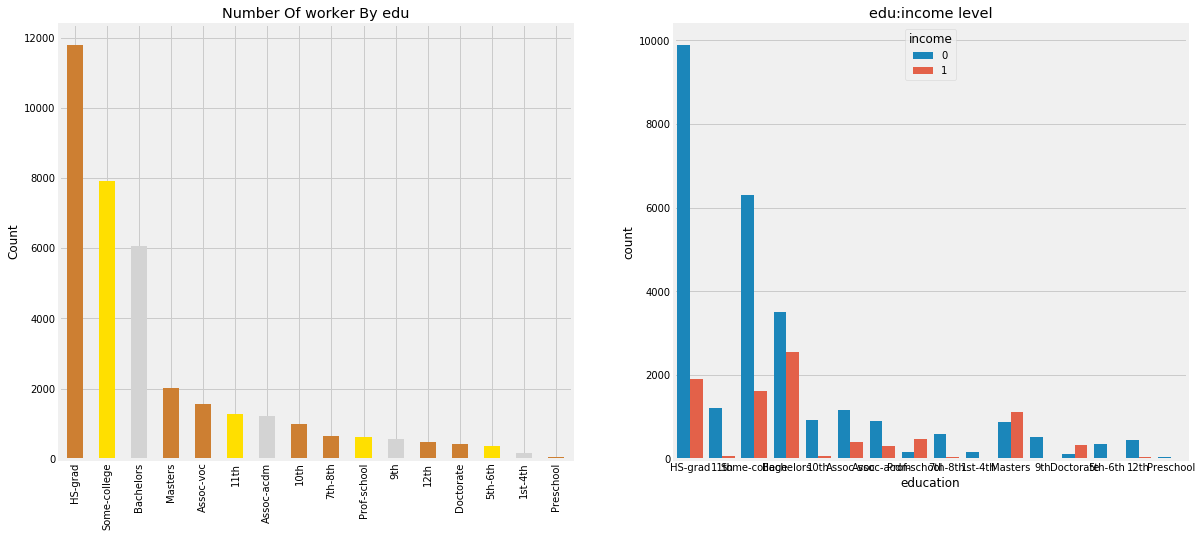

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['education'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of worker By edu')
ax[0].set_ylabel('Count')
sns.countplot('education',hue='income',data=data2,ax=ax[1])
ax[1].set_title('edu:income level')
plt.show()

In [19]:
encoder1 = BinaryEncoder(cols=['educational-num'])
df_bina1 = encoder1.fit_transform(data2)
data2=df_bina1
data2

,educational-num_0,educational-num_1,educational-num_2,educational-num_3,workclass_0,workclass_1,workclass_2,age,fnlwgt,education,...,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Age_band
0,0,0,0,0,0,0,0,49,246183,HS-grad,...,Sales,Husband,White,1,0,0,40,United-States,1,2
1,0,0,0,1,0,0,0,57,176904,11th,...,Handlers-cleaners,Husband,White,1,0,0,40,United-States,0,3
2,0,0,1,0,0,0,0,50,421561,Some-college,...,Exec-managerial,Not-in-family,White,1,0,0,40,United-States,0,2
3,0,0,1,0,0,0,0,24,29810,Some-college,...,Prof-specialty,Own-child,White,0,0,0,40,United-States,0,1
4,0,0,0,0,0,0,0,21,77572,HS-grad,...,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,0,0,0,34,South,0,1
5,0,0,1,0,0,0,0,38,97083,Some-college,...,Adm-clerical,Wife,Black,0,0,0,40,United-States,0,2
6,0,0,0,1,0,0,1,59,75785,11th,...,Other-service,Husband,White,1,0,0,40,United-States,0,3
7,0,0,0,0,0,0,0,52,156953,HS-grad,...,Handlers-cleaners,Husband,White,1,0,0,40,United-States,1,3
8,0,0,0,0,0,0,0,41,190885,HS-grad,...,Other-service,Unmarried,White,0,0,0,40,Mexico,0,2
9,0,0,1,1,0,0,0,38,272476,Bachelors,...,Prof-specialty,Wife,White,0,0,0,24,United-States,1,2


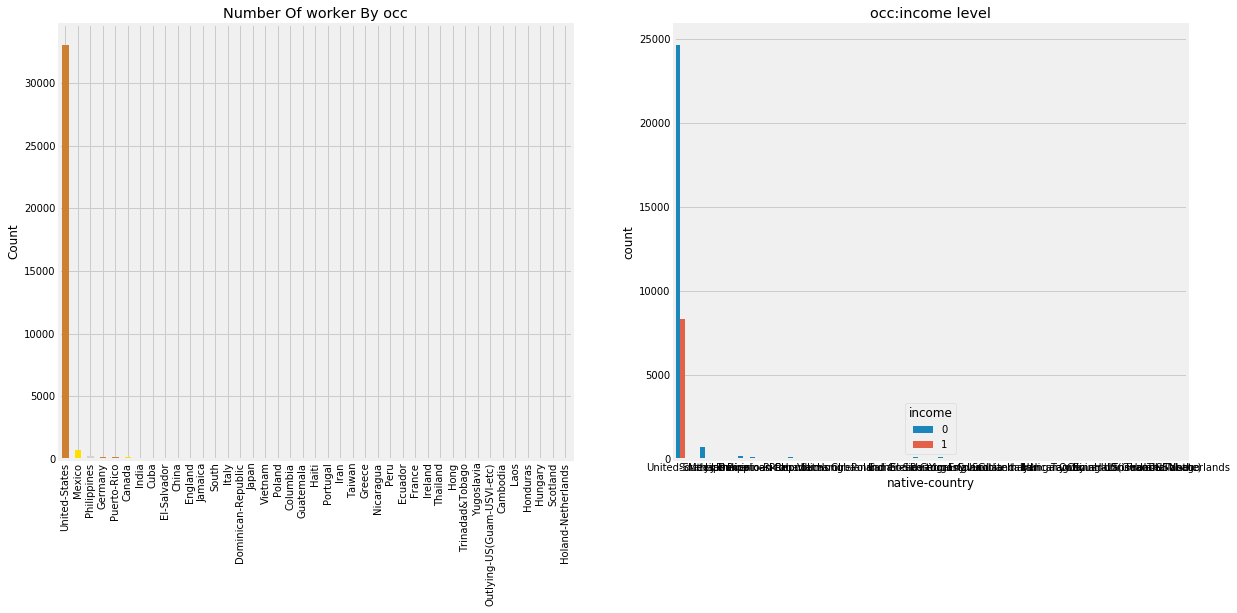

In [20]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['native-country'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of worker By occ')
ax[0].set_ylabel('Count')
sns.countplot('native-country',hue='income',data=data2,ax=ax[1])
ax[1].set_title('occ:income level')
plt.show()

In [21]:
data2=data2.rename(columns={'native-country':'country','capital-gain':'gain','capital-loss':'loss','hours-per-week':'hrs','martial-status':'martial'})

data2


,educational-num_0,educational-num_1,educational-num_2,educational-num_3,workclass_0,workclass_1,workclass_2,age,fnlwgt,education,...,occupation,relationship,race,gender,gain,loss,hrs,country,income,Age_band
0,0,0,0,0,0,0,0,49,246183,HS-grad,...,Sales,Husband,White,1,0,0,40,United-States,1,2
1,0,0,0,1,0,0,0,57,176904,11th,...,Handlers-cleaners,Husband,White,1,0,0,40,United-States,0,3
2,0,0,1,0,0,0,0,50,421561,Some-college,...,Exec-managerial,Not-in-family,White,1,0,0,40,United-States,0,2
3,0,0,1,0,0,0,0,24,29810,Some-college,...,Prof-specialty,Own-child,White,0,0,0,40,United-States,0,1
4,0,0,0,0,0,0,0,21,77572,HS-grad,...,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,0,0,0,34,South,0,1
5,0,0,1,0,0,0,0,38,97083,Some-college,...,Adm-clerical,Wife,Black,0,0,0,40,United-States,0,2
6,0,0,0,1,0,0,1,59,75785,11th,...,Other-service,Husband,White,1,0,0,40,United-States,0,3
7,0,0,0,0,0,0,0,52,156953,HS-grad,...,Handlers-cleaners,Husband,White,1,0,0,40,United-States,1,3
8,0,0,0,0,0,0,0,41,190885,HS-grad,...,Other-service,Unmarried,White,0,0,0,40,Mexico,0,2
9,0,0,1,1,0,0,0,38,272476,Bachelors,...,Prof-specialty,Wife,White,0,0,0,24,United-States,1,2


In [22]:

data2['country'] = data2['country'].map({'United-States': 1})

data2

,educational-num_0,educational-num_1,educational-num_2,educational-num_3,workclass_0,workclass_1,workclass_2,age,fnlwgt,education,...,occupation,relationship,race,gender,gain,loss,hrs,country,income,Age_band
0,0,0,0,0,0,0,0,49,246183,HS-grad,...,Sales,Husband,White,1,0,0,40,1.0,1,2
1,0,0,0,1,0,0,0,57,176904,11th,...,Handlers-cleaners,Husband,White,1,0,0,40,1.0,0,3
2,0,0,1,0,0,0,0,50,421561,Some-college,...,Exec-managerial,Not-in-family,White,1,0,0,40,1.0,0,2
3,0,0,1,0,0,0,0,24,29810,Some-college,...,Prof-specialty,Own-child,White,0,0,0,40,1.0,0,1
4,0,0,0,0,0,0,0,21,77572,HS-grad,...,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,0,0,0,34,NaN,0,1
5,0,0,1,0,0,0,0,38,97083,Some-college,...,Adm-clerical,Wife,Black,0,0,0,40,1.0,0,2
6,0,0,0,1,0,0,1,59,75785,11th,...,Other-service,Husband,White,1,0,0,40,1.0,0,3
7,0,0,0,0,0,0,0,52,156953,HS-grad,...,Handlers-cleaners,Husband,White,1,0,0,40,1.0,1,3
8,0,0,0,0,0,0,0,41,190885,HS-grad,...,Other-service,Unmarried,White,0,0,0,40,NaN,0,2
9,0,0,1,1,0,0,0,38,272476,Bachelors,...,Prof-specialty,Wife,White,0,0,0,24,1.0,1,2


In [23]:
data2.country.fillna(0,inplace=True)
data2

,educational-num_0,educational-num_1,educational-num_2,educational-num_3,workclass_0,workclass_1,workclass_2,age,fnlwgt,education,...,occupation,relationship,race,gender,gain,loss,hrs,country,income,Age_band
0,0,0,0,0,0,0,0,49,246183,HS-grad,...,Sales,Husband,White,1,0,0,40,1.0,1,2
1,0,0,0,1,0,0,0,57,176904,11th,...,Handlers-cleaners,Husband,White,1,0,0,40,1.0,0,3
2,0,0,1,0,0,0,0,50,421561,Some-college,...,Exec-managerial,Not-in-family,White,1,0,0,40,1.0,0,2
3,0,0,1,0,0,0,0,24,29810,Some-college,...,Prof-specialty,Own-child,White,0,0,0,40,1.0,0,1
4,0,0,0,0,0,0,0,21,77572,HS-grad,...,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,0,0,0,34,0.0,0,1
5,0,0,1,0,0,0,0,38,97083,Some-college,...,Adm-clerical,Wife,Black,0,0,0,40,1.0,0,2
6,0,0,0,1,0,0,1,59,75785,11th,...,Other-service,Husband,White,1,0,0,40,1.0,0,3
7,0,0,0,0,0,0,0,52,156953,HS-grad,...,Handlers-cleaners,Husband,White,1,0,0,40,1.0,1,3
8,0,0,0,0,0,0,0,41,190885,HS-grad,...,Other-service,Unmarried,White,0,0,0,40,0.0,0,2
9,0,0,1,1,0,0,0,38,272476,Bachelors,...,Prof-specialty,Wife,White,0,0,0,24,1.0,1,2


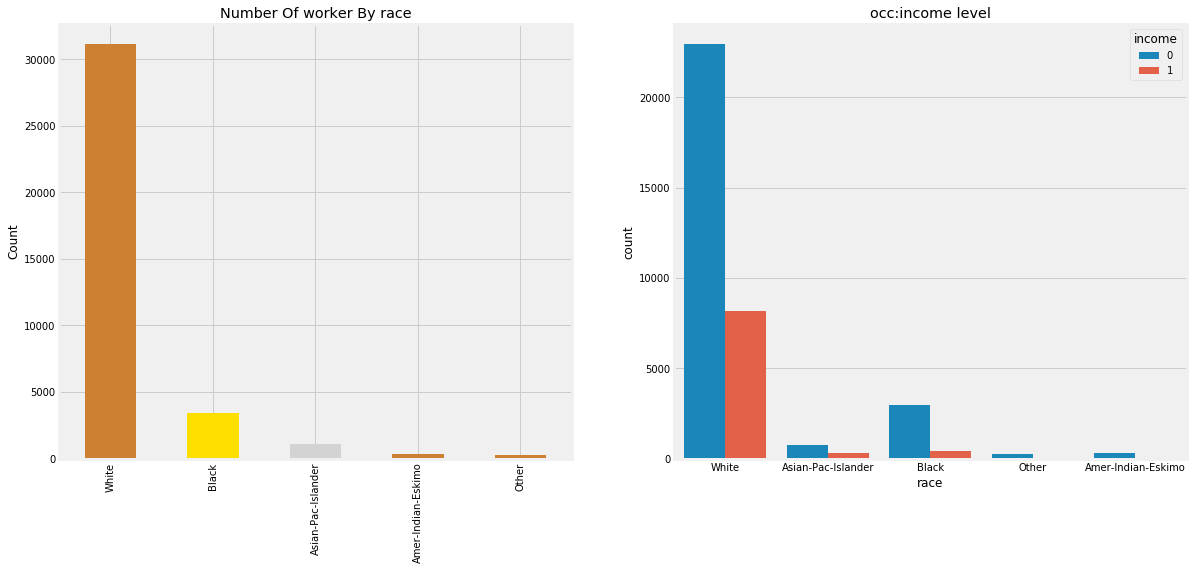

In [24]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['race'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of worker By race')
ax[0].set_ylabel('Count')
sns.countplot('race',hue='income',data=data2,ax=ax[1])
ax[1].set_title('occ:income level')
plt.show()

In [25]:
#data2['race'].replace( ((data2['race']!='Black')&(data2['race']!='White')),0,inplace=True)
#data2.race.replace(1, 'Black',inplace=True)
#data2.race.replace(2, 'White',inplace=True)

data2['race'].replace( 'Black',1,inplace=True)
data2['race'].replace( 'White',2,inplace=True)
data2

,educational-num_0,educational-num_1,educational-num_2,educational-num_3,workclass_0,workclass_1,workclass_2,age,fnlwgt,education,...,occupation,relationship,race,gender,gain,loss,hrs,country,income,Age_band
0,0,0,0,0,0,0,0,49,246183,HS-grad,...,Sales,Husband,2,1,0,0,40,1.0,1,2
1,0,0,0,1,0,0,0,57,176904,11th,...,Handlers-cleaners,Husband,2,1,0,0,40,1.0,0,3
2,0,0,1,0,0,0,0,50,421561,Some-college,...,Exec-managerial,Not-in-family,2,1,0,0,40,1.0,0,2
3,0,0,1,0,0,0,0,24,29810,Some-college,...,Prof-specialty,Own-child,2,0,0,0,40,1.0,0,1
4,0,0,0,0,0,0,0,21,77572,HS-grad,...,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,0,0,0,34,0.0,0,1
5,0,0,1,0,0,0,0,38,97083,Some-college,...,Adm-clerical,Wife,1,0,0,0,40,1.0,0,2
6,0,0,0,1,0,0,1,59,75785,11th,...,Other-service,Husband,2,1,0,0,40,1.0,0,3
7,0,0,0,0,0,0,0,52,156953,HS-grad,...,Handlers-cleaners,Husband,2,1,0,0,40,1.0,1,3
8,0,0,0,0,0,0,0,41,190885,HS-grad,...,Other-service,Unmarried,2,0,0,0,40,0.0,0,2
9,0,0,1,1,0,0,0,38,272476,Bachelors,...,Prof-specialty,Wife,2,0,0,0,24,1.0,1,2


In [26]:
data2['race'] = (
    pd.to_numeric(data2['race'],
                  errors='coerce')
      .fillna(0)
    )
data2

,educational-num_0,educational-num_1,educational-num_2,educational-num_3,workclass_0,workclass_1,workclass_2,age,fnlwgt,education,...,occupation,relationship,race,gender,gain,loss,hrs,country,income,Age_band
0,0,0,0,0,0,0,0,49,246183,HS-grad,...,Sales,Husband,2.0,1,0,0,40,1.0,1,2
1,0,0,0,1,0,0,0,57,176904,11th,...,Handlers-cleaners,Husband,2.0,1,0,0,40,1.0,0,3
2,0,0,1,0,0,0,0,50,421561,Some-college,...,Exec-managerial,Not-in-family,2.0,1,0,0,40,1.0,0,2
3,0,0,1,0,0,0,0,24,29810,Some-college,...,Prof-specialty,Own-child,2.0,0,0,0,40,1.0,0,1
4,0,0,0,0,0,0,0,21,77572,HS-grad,...,Handlers-cleaners,Not-in-family,0.0,0,0,0,34,0.0,0,1
5,0,0,1,0,0,0,0,38,97083,Some-college,...,Adm-clerical,Wife,1.0,0,0,0,40,1.0,0,2
6,0,0,0,1,0,0,1,59,75785,11th,...,Other-service,Husband,2.0,1,0,0,40,1.0,0,3
7,0,0,0,0,0,0,0,52,156953,HS-grad,...,Handlers-cleaners,Husband,2.0,1,0,0,40,1.0,1,3
8,0,0,0,0,0,0,0,41,190885,HS-grad,...,Other-service,Unmarried,2.0,0,0,0,40,0.0,0,2
9,0,0,1,1,0,0,0,38,272476,Bachelors,...,Prof-specialty,Wife,2.0,0,0,0,24,1.0,1,2


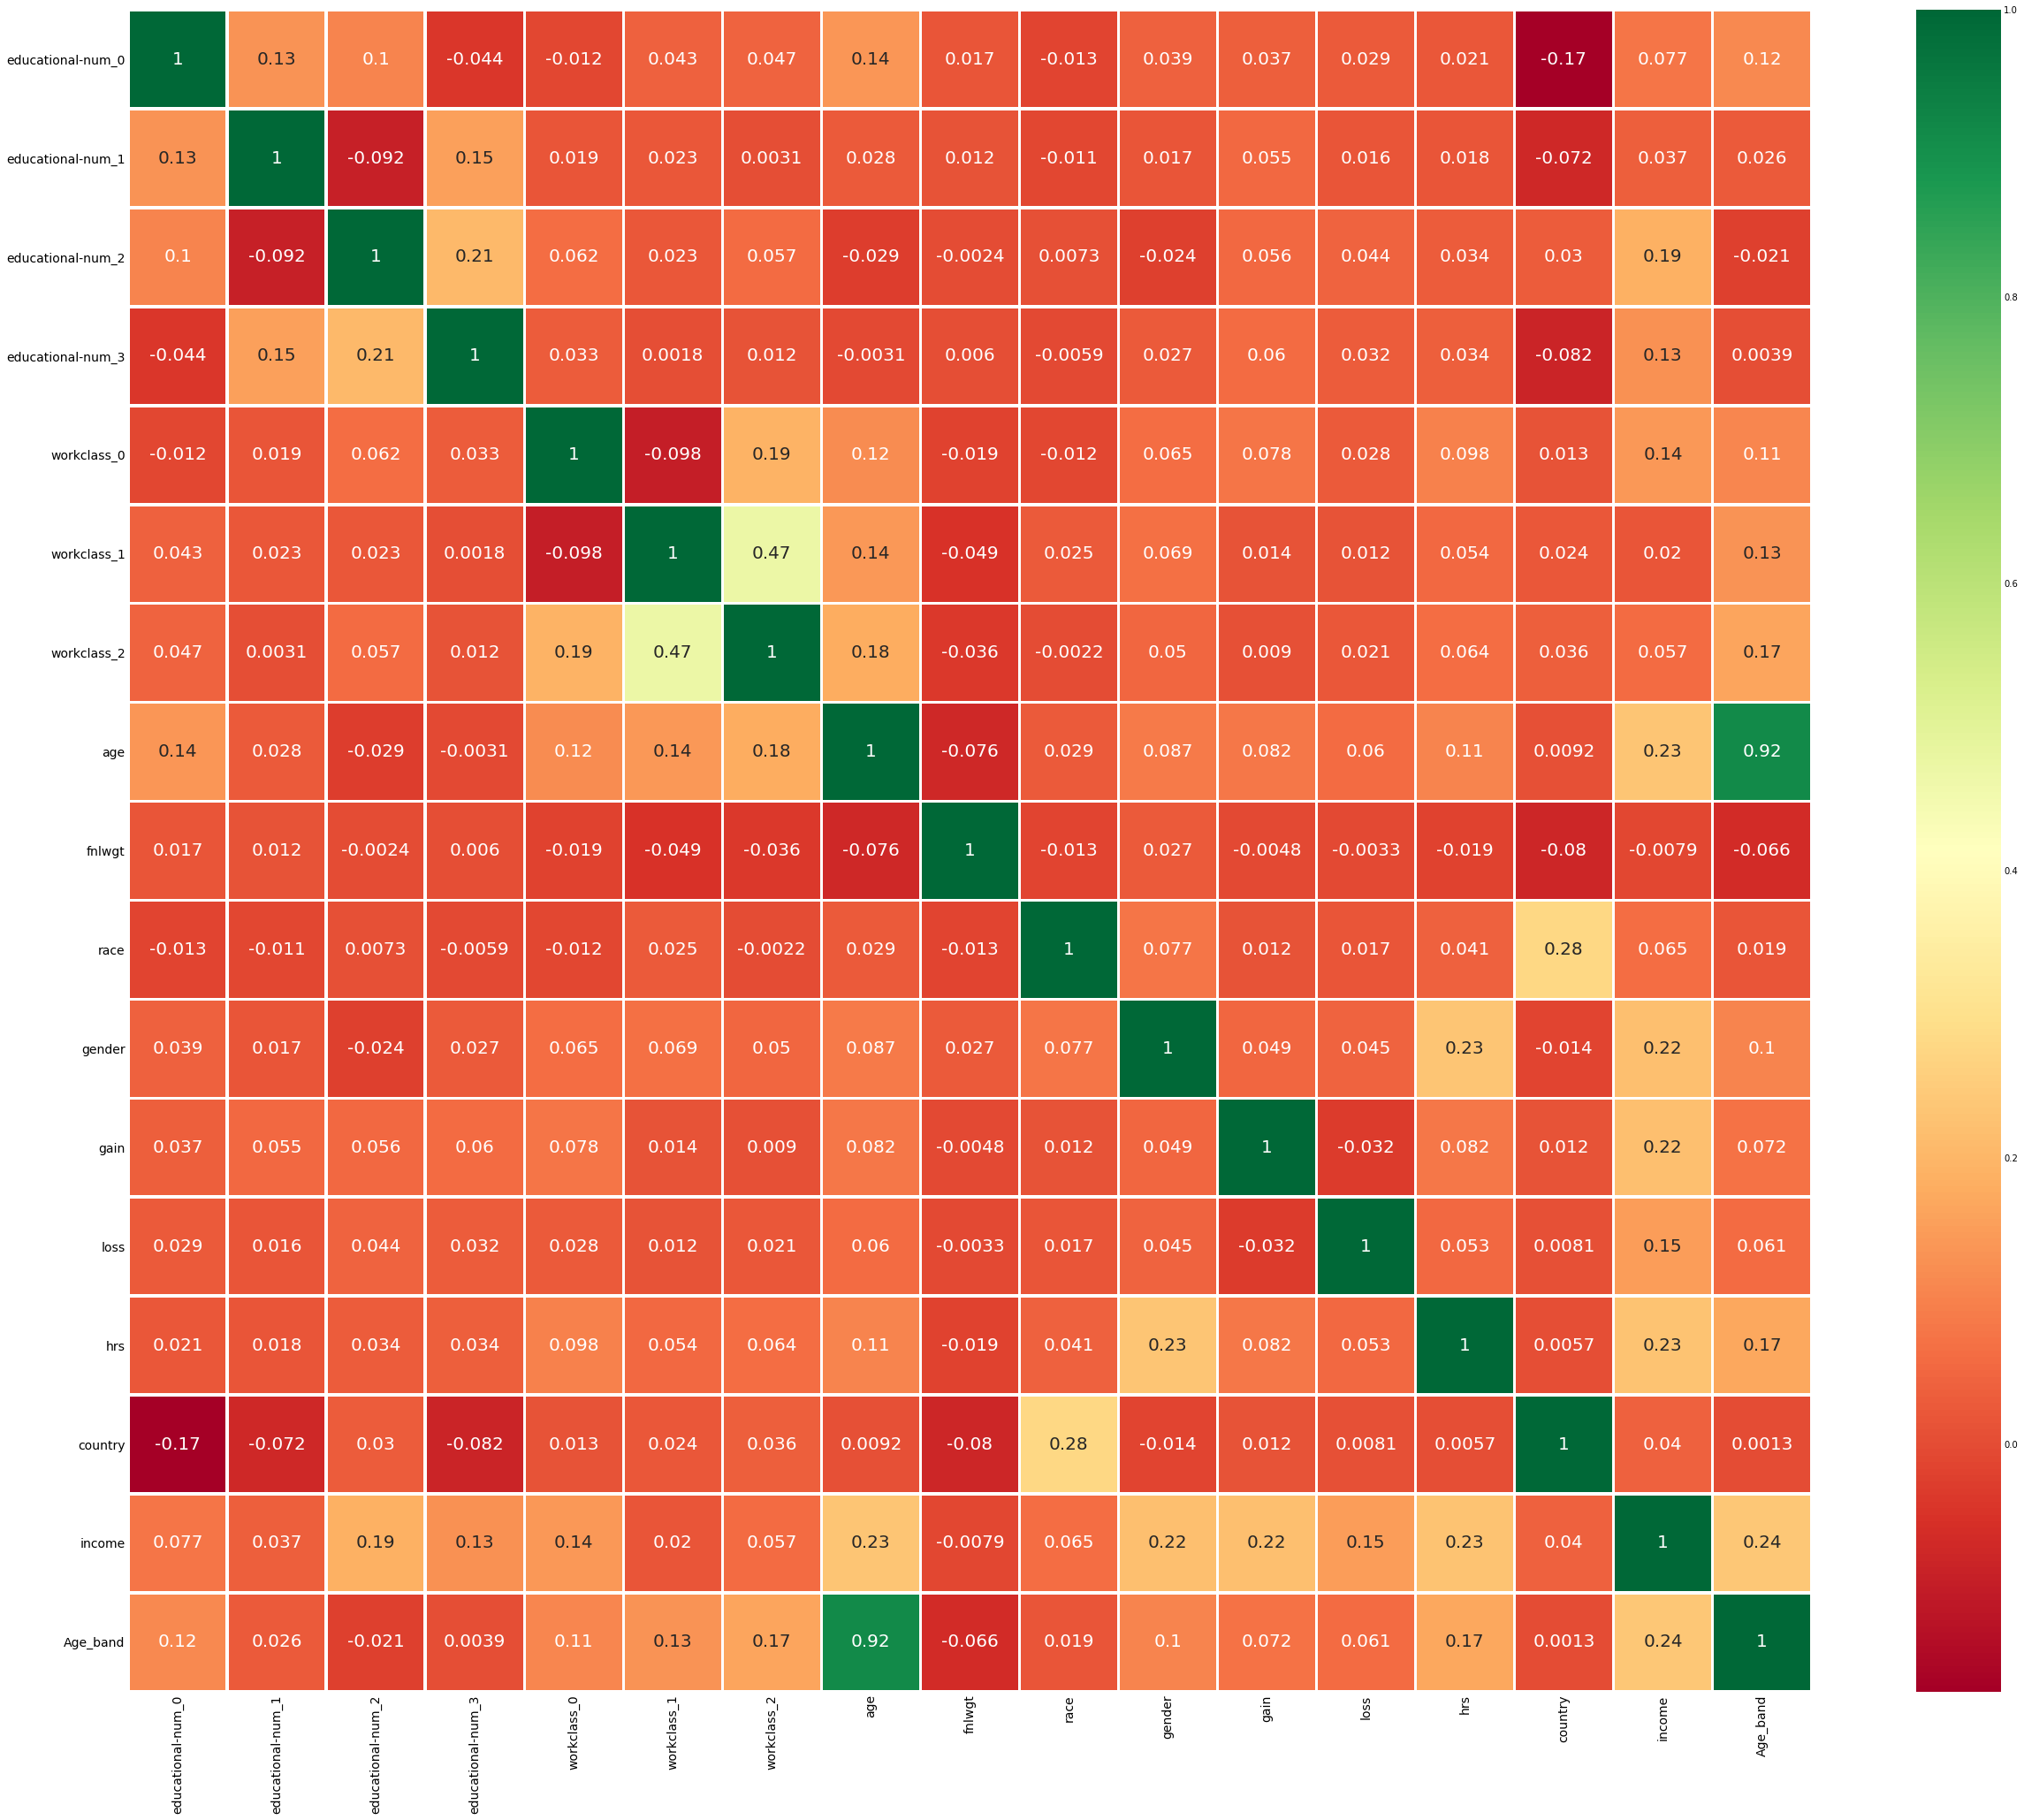

In [27]:
sns.heatmap(data2.corr(),annot=True,cmap='RdYlGn',linewidths=2.5,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(38,35)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [28]:
data2

,educational-num_0,educational-num_1,educational-num_2,educational-num_3,workclass_0,workclass_1,workclass_2,age,fnlwgt,education,...,occupation,relationship,race,gender,gain,loss,hrs,country,income,Age_band
0,0,0,0,0,0,0,0,49,246183,HS-grad,...,Sales,Husband,2.0,1,0,0,40,1.0,1,2
1,0,0,0,1,0,0,0,57,176904,11th,...,Handlers-cleaners,Husband,2.0,1,0,0,40,1.0,0,3
2,0,0,1,0,0,0,0,50,421561,Some-college,...,Exec-managerial,Not-in-family,2.0,1,0,0,40,1.0,0,2
3,0,0,1,0,0,0,0,24,29810,Some-college,...,Prof-specialty,Own-child,2.0,0,0,0,40,1.0,0,1
4,0,0,0,0,0,0,0,21,77572,HS-grad,...,Handlers-cleaners,Not-in-family,0.0,0,0,0,34,0.0,0,1
5,0,0,1,0,0,0,0,38,97083,Some-college,...,Adm-clerical,Wife,1.0,0,0,0,40,1.0,0,2
6,0,0,0,1,0,0,1,59,75785,11th,...,Other-service,Husband,2.0,1,0,0,40,1.0,0,3
7,0,0,0,0,0,0,0,52,156953,HS-grad,...,Handlers-cleaners,Husband,2.0,1,0,0,40,1.0,1,3
8,0,0,0,0,0,0,0,41,190885,HS-grad,...,Other-service,Unmarried,2.0,0,0,0,40,0.0,0,2
9,0,0,1,1,0,0,0,38,272476,Bachelors,...,Prof-specialty,Wife,2.0,0,0,0,24,1.0,1,2


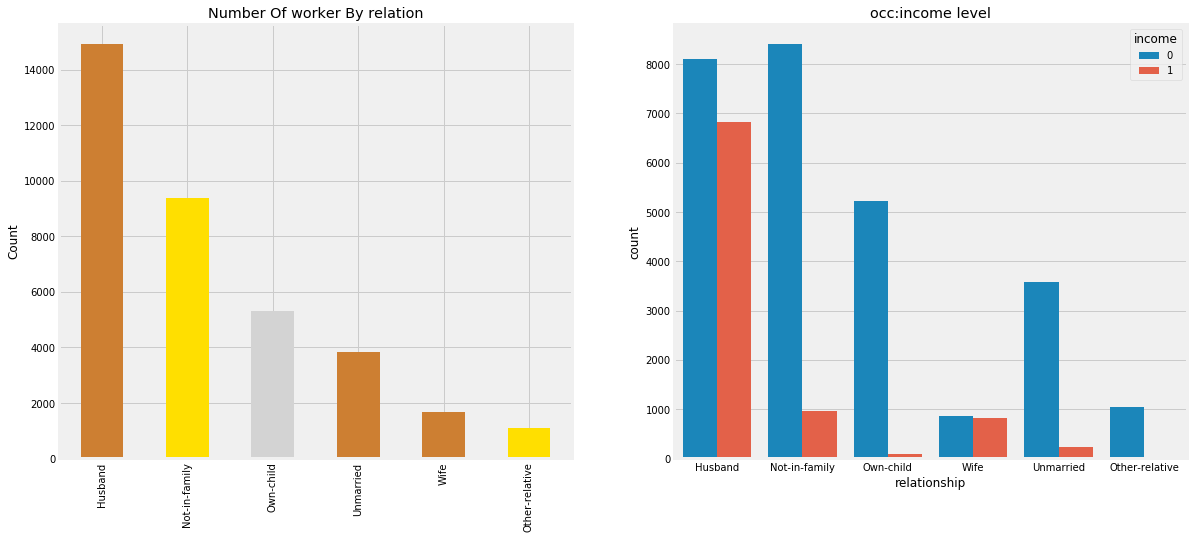

In [29]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['relationship'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of worker By relation')
ax[0].set_ylabel('Count')
sns.countplot('relationship',hue='income',data=data2,ax=ax[1])
ax[1].set_title('occ:income level')
plt.show()

In [30]:
data2=data2.rename(columns={'martial-status':'martial'})
data2=data2.drop(['age','education'],axis=1)
data2

,educational-num_0,educational-num_1,educational-num_2,educational-num_3,workclass_0,workclass_1,workclass_2,fnlwgt,marital-status,occupation,relationship,race,gender,gain,loss,hrs,country,income,Age_band
0,0,0,0,0,0,0,0,246183,Married-civ-spouse,Sales,Husband,2.0,1,0,0,40,1.0,1,2
1,0,0,0,1,0,0,0,176904,Married-civ-spouse,Handlers-cleaners,Husband,2.0,1,0,0,40,1.0,0,3
2,0,0,1,0,0,0,0,421561,Divorced,Exec-managerial,Not-in-family,2.0,1,0,0,40,1.0,0,2
3,0,0,1,0,0,0,0,29810,Never-married,Prof-specialty,Own-child,2.0,0,0,0,40,1.0,0,1
4,0,0,0,0,0,0,0,77572,Never-married,Handlers-cleaners,Not-in-family,0.0,0,0,0,34,0.0,0,1
5,0,0,1,0,0,0,0,97083,Married-civ-spouse,Adm-clerical,Wife,1.0,0,0,0,40,1.0,0,2
6,0,0,0,1,0,0,1,75785,Married-civ-spouse,Other-service,Husband,2.0,1,0,0,40,1.0,0,3
7,0,0,0,0,0,0,0,156953,Married-civ-spouse,Handlers-cleaners,Husband,2.0,1,0,0,40,1.0,1,3
8,0,0,0,0,0,0,0,190885,Separated,Other-service,Unmarried,2.0,0,0,0,40,0.0,0,2
9,0,0,1,1,0,0,0,272476,Married-civ-spouse,Prof-specialty,Wife,2.0,0,0,0,24,1.0,1,2


In [31]:
data2=data2.rename(columns={'marital-status':'martial'})
data2

,educational-num_0,educational-num_1,educational-num_2,educational-num_3,workclass_0,workclass_1,workclass_2,fnlwgt,martial,occupation,relationship,race,gender,gain,loss,hrs,country,income,Age_band
0,0,0,0,0,0,0,0,246183,Married-civ-spouse,Sales,Husband,2.0,1,0,0,40,1.0,1,2
1,0,0,0,1,0,0,0,176904,Married-civ-spouse,Handlers-cleaners,Husband,2.0,1,0,0,40,1.0,0,3
2,0,0,1,0,0,0,0,421561,Divorced,Exec-managerial,Not-in-family,2.0,1,0,0,40,1.0,0,2
3,0,0,1,0,0,0,0,29810,Never-married,Prof-specialty,Own-child,2.0,0,0,0,40,1.0,0,1
4,0,0,0,0,0,0,0,77572,Never-married,Handlers-cleaners,Not-in-family,0.0,0,0,0,34,0.0,0,1
5,0,0,1,0,0,0,0,97083,Married-civ-spouse,Adm-clerical,Wife,1.0,0,0,0,40,1.0,0,2
6,0,0,0,1,0,0,1,75785,Married-civ-spouse,Other-service,Husband,2.0,1,0,0,40,1.0,0,3
7,0,0,0,0,0,0,0,156953,Married-civ-spouse,Handlers-cleaners,Husband,2.0,1,0,0,40,1.0,1,3
8,0,0,0,0,0,0,0,190885,Separated,Other-service,Unmarried,2.0,0,0,0,40,0.0,0,2
9,0,0,1,1,0,0,0,272476,Married-civ-spouse,Prof-specialty,Wife,2.0,0,0,0,24,1.0,1,2


In [32]:
data2.martial.value_counts()

Married-civ-spouse       16838
Never-married            11697
Divorced                  5013
Separated                 1138
Widowed                   1032
Married-spouse-absent      430
Married-AF-spouse           29
Name: martial, dtype: int64

In [33]:
data2.relationship.value_counts()

Husband           14913
Not-in-family      9370
Own-child          5313
Unmarried          3821
Wife               1682
Other-relative     1078
Name: relationship, dtype: int64

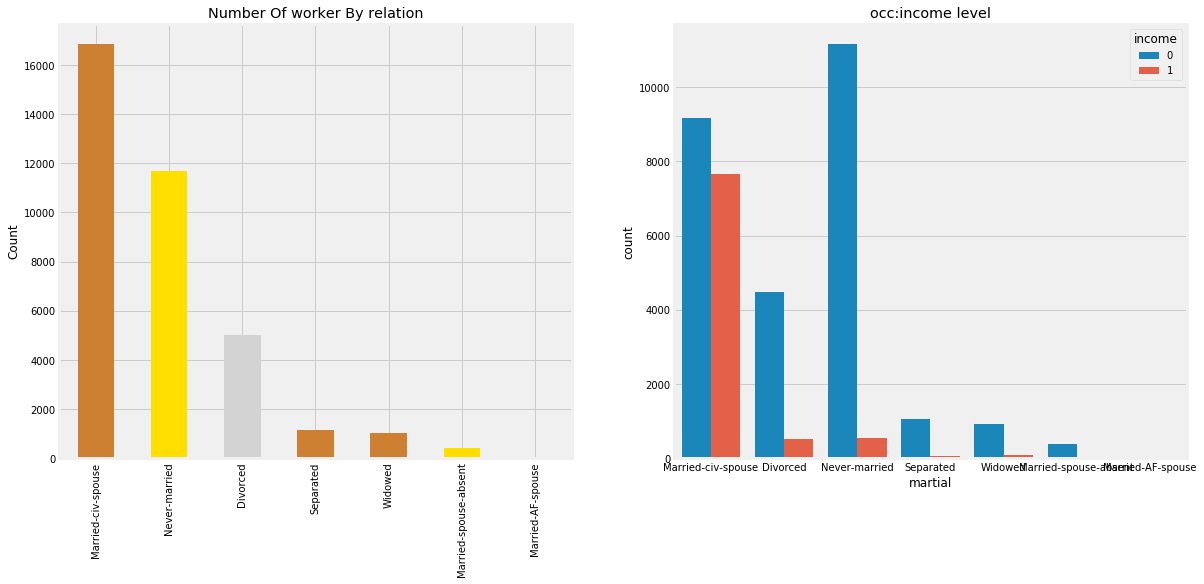

In [34]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data2['martial'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of worker By relation')
ax[0].set_ylabel('Count')
sns.countplot('martial',hue='income',data=data2,ax=ax[1])
ax[1].set_title('occ:income level')
plt.show()

In [35]:
data2['martial'] = (
    pd.to_numeric(data2['martial'],
                  errors='coerce')
      .fillna(0)
    )
data2

,educational-num_0,educational-num_1,educational-num_2,educational-num_3,workclass_0,workclass_1,workclass_2,fnlwgt,martial,occupation,relationship,race,gender,gain,loss,hrs,country,income,Age_band
0,0,0,0,0,0,0,0,246183,0.0,Sales,Husband,2.0,1,0,0,40,1.0,1,2
1,0,0,0,1,0,0,0,176904,0.0,Handlers-cleaners,Husband,2.0,1,0,0,40,1.0,0,3
2,0,0,1,0,0,0,0,421561,0.0,Exec-managerial,Not-in-family,2.0,1,0,0,40,1.0,0,2
3,0,0,1,0,0,0,0,29810,0.0,Prof-specialty,Own-child,2.0,0,0,0,40,1.0,0,1
4,0,0,0,0,0,0,0,77572,0.0,Handlers-cleaners,Not-in-family,0.0,0,0,0,34,0.0,0,1
5,0,0,1,0,0,0,0,97083,0.0,Adm-clerical,Wife,1.0,0,0,0,40,1.0,0,2
6,0,0,0,1,0,0,1,75785,0.0,Other-service,Husband,2.0,1,0,0,40,1.0,0,3
7,0,0,0,0,0,0,0,156953,0.0,Handlers-cleaners,Husband,2.0,1,0,0,40,1.0,1,3
8,0,0,0,0,0,0,0,190885,0.0,Other-service,Unmarried,2.0,0,0,0,40,0.0,0,2
9,0,0,1,1,0,0,0,272476,0.0,Prof-specialty,Wife,2.0,0,0,0,24,1.0,1,2


In [36]:
data2['relationship'].replace( 'Husband',2,inplace=True)


In [37]:
data2['relationship'].replace( 'Wife',1,inplace=True)


In [38]:
data2['relationship'] = (
    pd.to_numeric(data2['relationship'],
                  errors='coerce')
      .fillna(0)
    )
data2

,educational-num_0,educational-num_1,educational-num_2,educational-num_3,workclass_0,workclass_1,workclass_2,fnlwgt,martial,occupation,relationship,race,gender,gain,loss,hrs,country,income,Age_band
0,0,0,0,0,0,0,0,246183,0.0,Sales,2.0,2.0,1,0,0,40,1.0,1,2
1,0,0,0,1,0,0,0,176904,0.0,Handlers-cleaners,2.0,2.0,1,0,0,40,1.0,0,3
2,0,0,1,0,0,0,0,421561,0.0,Exec-managerial,0.0,2.0,1,0,0,40,1.0,0,2
3,0,0,1,0,0,0,0,29810,0.0,Prof-specialty,0.0,2.0,0,0,0,40,1.0,0,1
4,0,0,0,0,0,0,0,77572,0.0,Handlers-cleaners,0.0,0.0,0,0,0,34,0.0,0,1
5,0,0,1,0,0,0,0,97083,0.0,Adm-clerical,1.0,1.0,0,0,0,40,1.0,0,2
6,0,0,0,1,0,0,1,75785,0.0,Other-service,2.0,2.0,1,0,0,40,1.0,0,3
7,0,0,0,0,0,0,0,156953,0.0,Handlers-cleaners,2.0,2.0,1,0,0,40,1.0,1,3
8,0,0,0,0,0,0,0,190885,0.0,Other-service,0.0,2.0,0,0,0,40,0.0,0,2
9,0,0,1,1,0,0,0,272476,0.0,Prof-specialty,1.0,2.0,0,0,0,24,1.0,1,2


In [39]:
data2['hrs_band']=0
data2.loc[data2['hrs']<=10,'hrs_band']=0
data2.loc[(data2['hrs']>10)&(data2['hrs']<=20),'hrs_band']=1
data2.loc[(data2['hrs']>20)&(data2['hrs']<=30),'hrs_band']=2
data2.loc[(data2['hrs']>30)&(data2['hrs']<=50),'hrs_band']=3
data2.loc[(data2['hrs']>50)&(data2['hrs']<=60),'hrs_band']=4
data2.loc[(data2['hrs']>60)&(data2['hrs']<=80),'hrs_band']=5


data2.loc[data2['hrs']>80,'hrs_band']=6
data2

,educational-num_0,educational-num_1,educational-num_2,educational-num_3,workclass_0,workclass_1,workclass_2,fnlwgt,martial,occupation,relationship,race,gender,gain,loss,hrs,country,income,Age_band,hrs_band
0,0,0,0,0,0,0,0,246183,0.0,Sales,2.0,2.0,1,0,0,40,1.0,1,2,3
1,0,0,0,1,0,0,0,176904,0.0,Handlers-cleaners,2.0,2.0,1,0,0,40,1.0,0,3,3
2,0,0,1,0,0,0,0,421561,0.0,Exec-managerial,0.0,2.0,1,0,0,40,1.0,0,2,3
3,0,0,1,0,0,0,0,29810,0.0,Prof-specialty,0.0,2.0,0,0,0,40,1.0,0,1,3
4,0,0,0,0,0,0,0,77572,0.0,Handlers-cleaners,0.0,0.0,0,0,0,34,0.0,0,1,3
5,0,0,1,0,0,0,0,97083,0.0,Adm-clerical,1.0,1.0,0,0,0,40,1.0,0,2,3
6,0,0,0,1,0,0,1,75785,0.0,Other-service,2.0,2.0,1,0,0,40,1.0,0,3,3
7,0,0,0,0,0,0,0,156953,0.0,Handlers-cleaners,2.0,2.0,1,0,0,40,1.0,1,3,3
8,0,0,0,0,0,0,0,190885,0.0,Other-service,0.0,2.0,0,0,0,40,0.0,0,2,3
9,0,0,1,1,0,0,0,272476,0.0,Prof-specialty,1.0,2.0,0,0,0,24,1.0,1,2,2


In [40]:
data2=data2.drop(['hrs'],axis=1)
data2

,educational-num_0,educational-num_1,educational-num_2,educational-num_3,workclass_0,workclass_1,workclass_2,fnlwgt,martial,occupation,relationship,race,gender,gain,loss,country,income,Age_band,hrs_band
0,0,0,0,0,0,0,0,246183,0.0,Sales,2.0,2.0,1,0,0,1.0,1,2,3
1,0,0,0,1,0,0,0,176904,0.0,Handlers-cleaners,2.0,2.0,1,0,0,1.0,0,3,3
2,0,0,1,0,0,0,0,421561,0.0,Exec-managerial,0.0,2.0,1,0,0,1.0,0,2,3
3,0,0,1,0,0,0,0,29810,0.0,Prof-specialty,0.0,2.0,0,0,0,1.0,0,1,3
4,0,0,0,0,0,0,0,77572,0.0,Handlers-cleaners,0.0,0.0,0,0,0,0.0,0,1,3
5,0,0,1,0,0,0,0,97083,0.0,Adm-clerical,1.0,1.0,0,0,0,1.0,0,2,3
6,0,0,0,1,0,0,1,75785,0.0,Other-service,2.0,2.0,1,0,0,1.0,0,3,3
7,0,0,0,0,0,0,0,156953,0.0,Handlers-cleaners,2.0,2.0,1,0,0,1.0,1,3,3
8,0,0,0,0,0,0,0,190885,0.0,Other-service,0.0,2.0,0,0,0,0.0,0,2,3
9,0,0,1,1,0,0,0,272476,0.0,Prof-specialty,1.0,2.0,0,0,0,1.0,1,2,2


In [41]:
pd.crosstab([data2.gender,data2.income],data2.occupation,margins=True).style.background_gradient(cmap='summer_r')

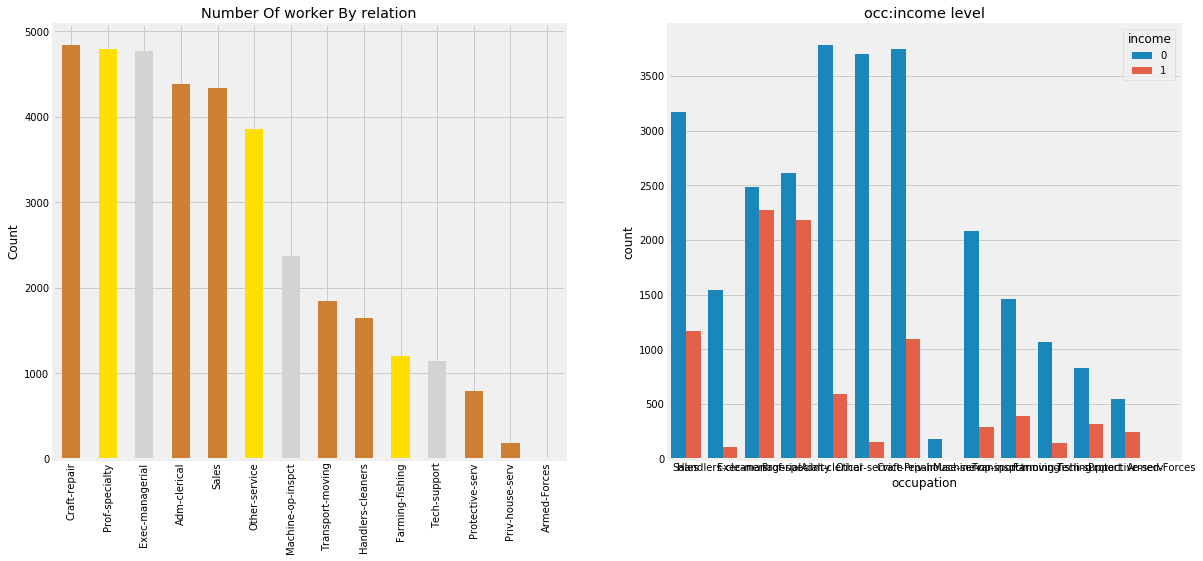

In [42]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['occupation'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of worker By relation')
ax[0].set_ylabel('Count')
sns.countplot('occupation',hue='income',data=data2,ax=ax[1])
ax[1].set_title('occ:income level')
plt.show()

In [43]:
data2['occupation'].replace( ['Craft-repair','Armed-Forces','Priv-house-serv'],1,inplace=True)


In [44]:
data2['occupation'].replace( ['Exec-managerial','Adm-clerical'],2,inplace=True)


In [45]:
data2['occupation'] = (
    pd.to_numeric(data2['occupation'],
                  errors='coerce')
      .fillna(0)
    )
data2

,educational-num_0,educational-num_1,educational-num_2,educational-num_3,workclass_0,workclass_1,workclass_2,fnlwgt,martial,occupation,relationship,race,gender,gain,loss,country,income,Age_band,hrs_band
0,0,0,0,0,0,0,0,246183,0.0,0.0,2.0,2.0,1,0,0,1.0,1,2,3
1,0,0,0,1,0,0,0,176904,0.0,0.0,2.0,2.0,1,0,0,1.0,0,3,3
2,0,0,1,0,0,0,0,421561,0.0,2.0,0.0,2.0,1,0,0,1.0,0,2,3
3,0,0,1,0,0,0,0,29810,0.0,0.0,0.0,2.0,0,0,0,1.0,0,1,3
4,0,0,0,0,0,0,0,77572,0.0,0.0,0.0,0.0,0,0,0,0.0,0,1,3
5,0,0,1,0,0,0,0,97083,0.0,2.0,1.0,1.0,0,0,0,1.0,0,2,3
6,0,0,0,1,0,0,1,75785,0.0,0.0,2.0,2.0,1,0,0,1.0,0,3,3
7,0,0,0,0,0,0,0,156953,0.0,0.0,2.0,2.0,1,0,0,1.0,1,3,3
8,0,0,0,0,0,0,0,190885,0.0,0.0,0.0,2.0,0,0,0,0.0,0,2,3
9,0,0,1,1,0,0,0,272476,0.0,0.0,1.0,2.0,0,0,0,1.0,1,2,2


In [46]:
data2=data2.drop(['fnlwgt'],axis=1)
data2

,educational-num_0,educational-num_1,educational-num_2,educational-num_3,workclass_0,workclass_1,workclass_2,martial,occupation,relationship,race,gender,gain,loss,country,income,Age_band,hrs_band
0,0,0,0,0,0,0,0,0.0,0.0,2.0,2.0,1,0,0,1.0,1,2,3
1,0,0,0,1,0,0,0,0.0,0.0,2.0,2.0,1,0,0,1.0,0,3,3
2,0,0,1,0,0,0,0,0.0,2.0,0.0,2.0,1,0,0,1.0,0,2,3
3,0,0,1,0,0,0,0,0.0,0.0,0.0,2.0,0,0,0,1.0,0,1,3
4,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,1,3
5,0,0,1,0,0,0,0,0.0,2.0,1.0,1.0,0,0,0,1.0,0,2,3
6,0,0,0,1,0,0,1,0.0,0.0,2.0,2.0,1,0,0,1.0,0,3,3
7,0,0,0,0,0,0,0,0.0,0.0,2.0,2.0,1,0,0,1.0,1,3,3
8,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0,0,0,0.0,0,2,3
9,0,0,1,1,0,0,0,0.0,0.0,1.0,2.0,0,0,0,1.0,1,2,2


In [47]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix


In [48]:
train,test=train_test_split(data2,test_size=0.5,random_state=0,stratify=data2['income'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data2[data2.columns[1:]]
Y=data2['income']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = data2.columns[1:]
forest = RandomForestClassifier(n_estimators=10000,random_state=0,n_jobs=-1)
forest.fit(train_X, train_Y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(train_X.shape[1]):
 print("%2d) %-*s %f" % (f + 1, 30,feat_labels[f],importances[indices[f]]))


In [48]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

('The accuracy of the Decision Tree is', 0.88108795400519657)


In [49]:
model=KNeighborsClassifier(n_neighbors=3,weights='uniform') 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

('The accuracy of the KNN is', 0.87754989219967938)


In [50]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

('The accuracy of the NaiveBayes is', 0.84869257559843003)


In [51]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

('The accuracy of the Random Forests is', 0.88926972193045495)


In [52]:
y=data2[['income']]
x=data2.drop(['income'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [53]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)


In [54]:
print('The accuracy of the linear is',metrics.accuracy_score(predictions.round(),y_test))

('The accuracy of the linear is', 0.80854984337571401)


In [62]:
from sklearn.decomposition import RandomizedPCA

comp=150
pca=RandomizedPCA(1000,whiten=True).fit(train_X)
xtr=pca.transform(train_X)
xtc=pca.transform(test_X)
model=KNeighborsClassifier(n_neighbors=3,weights='uniform') 
model.fit(xtr,train_Y)
prediction6=model.predict(xtc)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction6,test_Y))

/home/rajat/.local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


('The accuracy of the Random Forests is', 0.87743932776825695)
